# PROJECT: MELBOURNE HOUSING MARKET
**GIẢNG VIÊN HƯỚNG DẪN: THẦY TRẦN TRUNG KIÊN**  

**THÔNG TIN NHÓM 1:**
1. CAO VĂN PHÚC - 18120509
2. PHAN VĂN VÕ QUYỀN - 18120529

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Thu thập dữ liệu

- Tập dữ liệu mà nhóm lựa chọn là `Melbource housing market`, tập dữ liệu này thu thập thông tin về dữ liệu nhà đất tại thành phố Melbource xinh đẹp của nước Úc, nó bao gồm các thuộc tính Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale và distance từ C.B.D. Tập dữ liệu này được lấy từ trang `Kaggle` tại link sau [đây](https://www.kaggle.com/anthonypino/melbourne-housing-market), license của dữ liệu tại [đây](https://creativecommons.org/licenses/by-nc-sa/4.0/)  
- Vì đây là dữ liệu trên `Kaggle` nên chúng ta chỉ cần đăng nhập là có thể lấy được dữ liệu này về một cách dễ dàng  
- Tập dữ liệu này được người ta thu thập bằng các kết quả có sẵn công khai hằng tuần từ trang `Domain.com.au`
- Trong đồ án này, nhóm xin được phép chỉ sử dụng file `MELBOURNE_HOUSE_PRICES_LESS.csv`

## Khám phá dữ liệu

### Đọc dữ liệu từ file.csv vào DataFrame

In [2]:
mhm_df = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
mhm_df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
5,Airport West,4/32 Earl St,2,t,530000.0,S,Jellis,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
6,Airport West,3/74 Hawker St,2,u,540000.0,S,Barry,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
7,Airport West,1/26 Highridge Cr,3,h,715000.0,SP,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
8,Albanvale,1 Jackson Cct,6,h,NaN,PI,hockingstuart,1/04/2017,3021,Western Metropolitan,1899,14.0,Brimbank City Council
9,Albert Park,18 Mills St,3,h,1925000.0,S,Cayzer,1/04/2017,3206,Southern Metropolitan,3280,3.0,Port Phillip City Council


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

Số dòng, số cột sẽ lần lượt lưu vào hai biến num_rows và num_cols

In [3]:
num_rows, num_cols = mhm_df.shape
print(num_rows, num_cols)

63023 13


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau hay không?

Mỗi dòng cung cấp thông tin về một ngôi nhà ở Melbourne, có vẻ như không có một dòng nào lạc loài xuất hiện ở đây

### Dữ liệu có các dòng bị lặp không?

In [4]:
have_duplicated_rows = mhm_df.duplicated().sum()
have_duplicated_rows

2

### Vấn đề cần xử lý
- Có dòng bị lặp, cần loại bỏ các dòng đó

## Tiền xử lý

### Loại bỏ dòng dữ liệu bị lặp

In [5]:
mhm_df = mhm_df.drop_duplicates()
mhm_df.shape

(63021, 13)

Sau khi loại bỏ dòng lặp, thì mhm_df còn đúng 63021 dòng dữ liệu

## Khám phá dữ liệu (tiếp tục)

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của dữ liệu trên trang `Kaggle`
- Suburb: Đơn vị địa lý, hành chính nhỏ hơn ở dưới mức hội đồng
- Address: Địa chỉ cụ thể của ngôi nhà
- Rooms: Số phòng của ngôi nhà
- Price: Giá của ngôi nhà, tính bằng đô la Úc
- Method:
    - S - tài sản đã bán
    - SP - tài sản đã bán trước đó
    - PI - tài sản được chuyển vào
    - PN - bán trước không được tiết lộ
    - SN - bán không được tiết lộ
    - VB - giá thầu của nhà cung cấp
    - W - thu hồi trước khi đấu giá
    - SA - bán sau khi đấu giá
    - SS - giá bán sau đấu giá không được tiết lộ
- Type:
    - h - nhà, biệt thự, sân thượng
    - u - nhà đơn, nhà hai tầng
    - t - nhà phố
- Postcode: Mã bưu điện
- SellerG: Đại lý bất động sản
- Date: Ngày bán
- Distance: Khoảng cách từ CBD tính bằng Kilômét
- RegionName: Khu vực chung (Tây, Tây Bắc, Bắc, Đông Bắc… vv)
- Propertycount: Số lượng bất động sản của Suburb
- CouncilArea: Hội đồng quản lý khu vực

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [6]:
mhm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63021 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63021 non-null  object 
 1   Address        63021 non-null  object 
 2   Rooms          63021 non-null  int64  
 3   Type           63021 non-null  object 
 4   Price          48432 non-null  float64
 5   Method         63021 non-null  object 
 6   SellerG        63021 non-null  object 
 7   Date           63021 non-null  object 
 8   Postcode       63021 non-null  int64  
 9   Regionname     63021 non-null  object 
 10  Propertycount  63021 non-null  int64  
 11  Distance       63021 non-null  float64
 12  CouncilArea    63021 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.7+ MB


Trong Pandas, kiểu dữ liệu `object` thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu `object` chứa địa chỉ). Nếu một cột trong dataframe có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau; để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu. Do đó tiền hành code hàm open_object_dtype trả về tập các kiểu dữ liệu có ở trong các cột

In [7]:
def open_object_dtype(s):
    dtypes = set(s.map(type))
    return dtypes

In [8]:
obj_cols = mhm_df.select_dtypes(["object"]).columns
data = obj_cols.map(lambda x: open_object_dtype(mhm_df[x]))
pd.Series(data=data, index = obj_cols)

Suburb         {<class 'str'>}
Address        {<class 'str'>}
Type           {<class 'str'>}
Method         {<class 'str'>}
SellerG        {<class 'str'>}
Date           {<class 'str'>}
Regionname     {<class 'str'>}
CouncilArea    {<class 'str'>}
dtype: object

**Vấn đề cần tiền xử lí:**
- Cột `Date` đang có kiểu dữ liệu là `str`, để khám phá thêm cột này ta sẽ phải chuyển nó về dạng `datetime`

## Tiền xử lý

In [9]:
mhm_df['Date'] = pd.to_datetime(mhm_df['Date'], format = '%d/%m/%Y')
mhm_df['Date'].dtypes

dtype('<M8[ns]')

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột dữ liệu numeric, các giá trị được phân bố như thế nào?

Chúng ta xếp cột `Date` vào cột dạng numeric. Như vậy có vẻ có tổng cộng 6 cột dạng numeric, đó là `Date` `Rooms`, `Price`, `Postcode`, `Propertycount` và `Distance`. Tuy nhiên cột `Postcode` thực chất là dạng categorical, vì mã bưu điện thì được đánh dưới dạng số. Vậy số cột numeric thực sự là `Date`, `Rooms`, `Price`, `Propertycount` và `Distance`  

Với mỗi cột numeric, ta sẽ tính tỉ lệ phần trăm giá trị bị thiếu (từ 0 đến 100), min và max. Kết quả được lưu vào dataframe `nume-col_profiles_df`

In [10]:
pd.options.display.float_format = '{:,.0f}'.format
nume_cols = ["Date", "Rooms", "Price", "Propertycount", "Distance"]

def missing_ratio(s):
    return s.isnull().mean() * 100

nume_col_profiles_df = mhm_df[nume_cols].agg([missing_ratio, 'min', 'max'])
nume_col_profiles_df

,Date,Rooms,Price,Propertycount,Distance
missing_ratio,0,0,23,0,0
min,2016-01-28 00:00:00,1,"85,000",39,0
max,2018-10-13 00:00:00,31,"11,200,000","21,650",64


Cột `Price` có phần trăm giá trị bị thiếu là 23%, điều này không nằm ngoài dự tính bởi lẽ như trong file mô tả có nói, cột `Method` sẽ cho chúng ta biết được phương thức bán nhà, với các phương thức "PN", "SN", ... thì giá nhà sẽ không được công khai. Do đó với các giá trị thiếu này ta sẽ không loại bỏ chúng. Với các giá trị min có lẽ không có gì bất thường. Nhưng với giá trị max chúng ta có thể thấy ngôi nhà có số phòng nhiều nhất lên đến 31 phòng, ngôi nhà có giá cao nhất lên đến 11,200,000 đô Úc (tức là khoảng 160 tỉ VND), chúng ta sẽ thử tính toán và vẽ biểu đồ xem thử các giá trị này có thực sự bất thường hay không? 

In [11]:
rooms_value_counts = pd.DataFrame(mhm_df['Rooms'].value_counts())
rooms_value_counts.columns = ['Num of houses']
rooms_value_counts

,Num of houses
3,27949
4,15747
2,13247
5,3434
1,2111
6,424
7,61
8,29
10,7
9,5


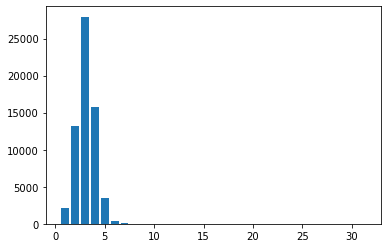

In [12]:
plt.bar(rooms_value_counts.index, rooms_value_counts['Num of houses']);

Theo quan sát thì chúng ta có thể nhận thấy rằng những ngôi nhà có nhiều hơn 7 phòng đã là rất hiếm, vì thế ngôi nhà có 31 phòng thực sự là điều kì lạ. Chúng ta không thể khẳng định chắc chắn được là liệu có hay không căn nhà với 31 phòng, hay đây là sai sót trong quá trình nhập liệu, vì thế mà ta sẽ không bỏ đi chúng, chỉ tiến hành khám phá và coi nó như một giá trị ngoại lệ

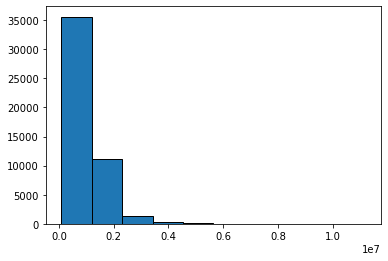

In [13]:
plt.hist(mhm_df['Price'], edgecolor='black');

In [14]:
len(mhm_df[mhm_df['Price'] > 5000000])

73

Theo quan sát, các ngôi nhà có giá trên 5,000,000 đô la Úc thực sự chiếm tỉ lệ rất ít, tuy nhiên chúng ta cũng không thể khẳng định được liệu căn nhà có giá 11,200,000 có thật hay không hay là do sai sót trong quá trình nhập liệu, thực tế thì vẫn có các siêu biệt thự dành cho giới nhà giàu. Do đó, ta sẽ giữ lại các giá trị này, chỉ tiến hành khám phá chúng và xem như những giá trị ngoại lệ hay giá trị đặc biệt

### Với mỗi cột dữ liệu categorical, các giá trị được phân bố như thế nào?

mhm_df có tổng cộng 8 cột dữ liệu dạng categorical là `Suburb`, `Address`, `Type`, `Method`, `SellerG`, `Regionname`, `CouncilArea`, `Postcode`  

Với mỗi cột categorical, ta tiến hành tính phần trăm giá trị bị thiếu (từ 0 đến 100), tính số lượng giá trị khác nhau, list/array các giá trị khác nhau. Kết quả sẽ được lưu vào dataframe `cate_col_profiles_df`

In [15]:
cate_cols = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname', 'CouncilArea', 'Postcode']
def num_diff_vals(s):
    return s.nunique()

def diff_vals(s):
    return s.unique()

cate_col_profiles_df = mhm_df[cate_cols].agg([missing_ratio, num_diff_vals, diff_vals])

cate_col_profiles_df

,Suburb,Address,Type,Method,SellerG,Regionname,CouncilArea,Postcode
missing_ratio,0,0,0,0,0,0,0,0
num_diff_vals,380,57754,3,9,476,8,34,225
diff_vals,"[Abbotsford, Aberfeldie, Airport West, Albanva...","[49 Lithgow St, 59A Turner St, 119B Yarra St, ...","[h, t, u]","[S, SP, PI, SN, VB, PN, SA, W, SS]","[Jellis, Marshall, Nelson, Barry, hockingstuar...","[Northern Metropolitan, Western Metropolitan, ...","[Yarra City Council, Moonee Valley City Counci...","[3067, 3040, 3042, 3021, 3206, 3020, 3078, 301..."


### Làm rõ hơn ý nghĩa của cột `Suburb` và `CouncilArea`

Theo mô tả của file dữ liệu thì:
- Suburb: Đơn vị địa lý, hành chính nhỏ hơn ở dưới mức hội đồng
- CouncilArea: hội đồng quản lí của khu vực  

Ở Úc, chính quyền địa phương là cấp hành chính thấp nhất, nằm dưới tiểu bang và liên bang. Cơ quan quyền lực nhà nước đóng trên địa phương được gọi là hội đồng. Khác với Việt Nam, mỗi phường, xã, thị trấn (đơn vị hành chính nhỏ nhất ở nước ta) đều tồn tại một Hội đồng Nhân dân, ở Úc lại không chia nhỏ ra như vậy, mỗi hội đồng bao gồm nhiều suburb,do đó mà ở Úc chỉ có 565 chính quyền địa phương mà thôi. Bây giờ trước tiên chúng ta sẽ cùng xem thử mỗi hội đồng ở trong dữ liệu này bao gồm những suburb nào

In [16]:
pd.set_option("display.max_colwidth", 1000)
su_in_ca_df = mhm_df[['Suburb', 'CouncilArea']]
su_in_ca_df = su_in_ca_df.groupby(['CouncilArea'])['Suburb'].apply(set)
su_in_ca_df = pd.DataFrame(su_in_ca_df)
su_in_ca_df.head()

,Suburb
CouncilArea,
Banyule City Council,"{Montmorency, Heidelberg, Ivanhoe, Bellfield, Bundoora, Eaglemont, Lower Plenty, Eltham North, Rosanna, Viewbank, Greensborough, Ivanhoe East, Yallambie, viewbank, Heidelberg Heights, St Helena, Watsonia North, Eltham, MacLeod, Watsonia, Heidelberg West, Macleod, Briar Hill}"
Bayside City Council,"{Black Rock, Hampton East, Hampton, Highett, Sandringham, Cheltenham, Brighton East, Beaumaris, Brighton}"
Boroondara City Council,"{Canterbury, Glen Iris, Kew East, Deepdene, Hawthorn, Ashburton, Kew, Mont Albert, Surrey Hills, Camberwell, Balwyn, Balwyn North, Hawthorn East}"
Brimbank City Council,"{Delahey, Tullamarine, Sydenham, Albion, Hillside, Sunshine West, St Albans, Keilor Park, Keilor Downs, Albanvale, Kealba, Keilor, Cairnlea, Keilor Lodge, Derrimut, Keilor East, Kings Park, Sunshine, Taylors Lakes, Deer Park, Sunshine North, Ardeer, Brooklyn}"
Cardinia Shire Council,"{Beaconsfield, Beaconsfield Upper, Menzies Creek, Guys Hill, Cockatoo, Pakenham, Gembrook, Officer, Avonsleigh, Emerald}"


Theo [wikipedia](https://vi.wikipedia.org/wiki/Ch%C3%ADnh_quy%E1%BB%81n_%C4%91%E1%BB%8Ba_ph%C6%B0%C6%A1ng_%E1%BB%9F_%C3%9Ac) mặc dù chính quyền địa phương ở Úc được phân chia khá đơn giản, nhưng một vài khu vực địa lý khá rộng và có ít dân lại không trực thuộc cấp chính quyền cơ sở nào cả. Nhiệm vụ của chính quyền địa phương ở những khu vực này thường do các tổ chức, cơ quan đặc trách ngoài chính quyền đảm nhận (như các khu nghỉ mát trên núi ở bang Victoria), hoặc do nhà chức trách tiểu bang cai quản toàn bộ. Như vậy chúng ta thử kiểm tra xem liệu có sự đụng độ suburb nào ở các chính quyền địa phương hay không 

In [17]:
su_in_ca_df = su_in_ca_df.explode('Suburb')
su_in_ca_df.duplicated().sum()

0

Như chúng ta quan sát, đã không có sự nhập nhằng nào trong việc quản lí, như vậy người dùng dễ dàng hơn trong việc làm giấy tờ nhà hay đơn giản hơn là việc đặt hàng online chẳng hạn (có thể có, vì KTX B ĐHQG là một ví dụ trong sự nhập nhằng địa chỉ 😉, nhập nhằng ở đây là theo cách hiểu của người nhập liệu, người dân, hiển nhiên trên giấy tờ quốc gia, một vùng vẫn luôn được thống nhất)

## Đưa ra câu hỏi cần trả lời

Sau khi khám phá và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể trả lời được bằng dữ liệu:
- **Câu 1: Giá nhà (`Price`) thay đổi như thế nào nếu khoảng cách (`Distance`) thay đổi?**
    - Trả lời được câu hỏi này sẽ giúp cho người mua biết được khoảng cách chi phối như thế nào đến giá nhà, từ đó lựa chọn mua cho hợp lí, có thể chấp nhận được mức khoảng cách nào để tối thiểu được giá nhà
    
    
- **Câu 2: Đâu là top 5 nhân viên seller (`SellerG`) rao bán được nhiều nhà nhất trong mỗi năm?**
    - Thường thì con người ta sẽ có niềm tin vào số đông nhiều hơn, do vậy mà họ cũng sẽ khá là tin rằng nhân viên nào rao bán được nhiều nhà hơn thì sẽ uy tín hơn, do đó mà việc thống kê top 5 nhân viên mỗi năm sẽ giúp cho người mua có lựa chọn phù hợp với bản thân
    
    
- **Câu 3: Giá nhà trung bình của mỗi loại nhà (`Type`) tại các vùng (`Regionname`) là bao nhiêu?**
    - Trả lời được câu hỏi này sẽ giúp người mua nhà biết được giá mỗi loại nhà ở từng vùng là bao nhiêu, từ đó có sự lựa chọn hợp lí giữa hai yếu tố vùng và loại nhà, chẳng hạn như nếu bắt buộc phải ở vùng Northern Metropolitan nhưng kinh tế eo hẹp, người mua có thể suy nghĩ về việc đổi một loại nhà rẻ hơn
    
    
- **Câu 4: Trong ba năm thu thập dữ liệu, trung bình giá nhà có sự thay đổi như thế nào qua các tháng?**
    - Trả lời được câu hỏi này sẽ giúp cho người mua biết được xu hướng thay đổi giá nhà để lựa chọn thời điểm mua cho thật hợp lí và phù hợp với giá tiền, vì trong thực tế có một số thời điểm trong năm giá nhà sẽ bị thổi lên như bong bóng và tăng rất cao  
    
- **Câu 5: Phần trăm doanh số bán nhà theo từng mùa là bao nhiêu?**
    - Trả lời được câu hỏi này sẽ giúp chúng ta thấy được doanh số bán nhà theo từng mùa, từ đó xem xem rằng liệu doanh số bán ra có tính chu kì gì hay không, từ đó có thể dùng nó làm xu hướng chung khi đi mua nhà

## Tiền xử lý

Đầu tiên, thêm cột thuộc tính `Month` và `Year` vào dataframe mhm_df

In [18]:
mhm_df['Month'] = mhm_df['Date'].dt.month
mhm_df['Year'] = mhm_df['Date'].dt.year
mhm_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Month,Year
0,Abbotsford,49 Lithgow St,3,h,"1,490,000",S,Jellis,2017-04-01,3067,Northern Metropolitan,4019,3,Yarra City Council,4,2017
1,Abbotsford,59A Turner St,3,h,"1,220,000",S,Marshall,2017-04-01,3067,Northern Metropolitan,4019,3,Yarra City Council,4,2017
2,Abbotsford,119B Yarra St,3,h,"1,420,000",S,Nelson,2017-04-01,3067,Northern Metropolitan,4019,3,Yarra City Council,4,2017
3,Aberfeldie,68 Vida St,3,h,"1,515,000",S,Barry,2017-04-01,3040,Western Metropolitan,1543,8,Moonee Valley City Council,4,2017
4,Airport West,92 Clydesdale Rd,2,h,"670,000",S,Nelson,2017-04-01,3042,Western Metropolitan,3464,10,Moonee Valley City Council,4,2017


## Phân tích dữ liệu để trả lời câu hỏi

### Câu 1: Giá nhà thay đổi như thế nào khi khoảng cách thay đổi?

Để trả lời được câu hỏi này chúng ta cần thực hiện như sau:
- Tạo dataframe distance_price_df từ mhm_df với hai cột `Price` và `Distance`
- Vì khoảng cách có tới 180 giá trị riêng biệt, đồng thời nhiều khoảng cách lại mang ý nghĩa khá tương đồng nhau, chẳng hạn 10 km với 10,1 km sẽ không có gì thay đổi nhiều trong suy nghĩ của người mua nhà, do đó chúng ta tiến hành chia bin cho khoảng cách, với độ rộng mỗi bin là 3 (3 là ngưỡng mà nhóm đặt ra, xem như là ngưỡng có thể chấp nhận được khi khoảng cách thay đổi), dùng hàm cut trong pandas để phân đoạn và xếp từng giá trị `Price` vào cột mới `Bins`
- Tính trung bình giá nhà theo từng `Bins`
- Để vẽ được biểu đồ ta cần thêm cột `Bins_average` là giá trị trung bình của biên trái và biên phải của mỗi bin, nhằm đại diện cho bin đó, vì cột `Bins` hiện tại đang ở dạng categorical
- Vẽ biểu đồ đường để xem sự thay đổi của giá nhà khi khoảng cách thay đổi, trục hoành là giá trị trong `Bins_average` đặt tên lại là 'Distance', trục tung là `Price`

- Code bước 1:

In [19]:
distance_price_df = mhm_df[['Price', 'Distance']]
distance_price_df.head()

,Price,Distance
0,"1,490,000",3
1,"1,220,000",3
2,"1,420,000",3
3,"1,515,000",8
4,"670,000",10


- Code bước 2:

In [20]:
bins = np.arange(0, distance_price_df['Distance'].max() + 3, 3)
bins

array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.,
       39., 42., 45., 48., 51., 54., 57., 60., 63., 66.])

In [21]:
distance_price_df['Bins'] = pd.cut(distance_price_df['Distance'], bins)
distance_price_df.head()

,Price,Distance,Bins
0,"1,490,000",3,"(0.0, 3.0]"
1,"1,220,000",3,"(0.0, 3.0]"
2,"1,420,000",3,"(0.0, 3.0]"
3,"1,515,000",8,"(6.0, 9.0]"
4,"670,000",10,"(9.0, 12.0]"


- Code bước 3:

In [22]:
distance_price_df = pd.DataFrame(distance_price_df.groupby(['Bins'])['Price'].mean())
distance_price_df.head()

,Price
Bins,
"(0.0, 3.0]","1,167,598"
"(3.0, 6.0]","1,151,683"
"(6.0, 9.0]","1,153,413"
"(9.0, 12.0]","1,069,961"
"(12.0, 15.0]","942,017"


- Code bước 4:

In [23]:
pd.options.display.float_format = '{:,.2f}'.format
distance_price_df['Bins_average'] = np.arange(1.5, 66, step=3.0)
distance_price_df.head()

,Price,Bins_average
Bins,,
"(0.0, 3.0]","1,167,598.32",1.50
"(3.0, 6.0]","1,151,683.35",4.50
"(6.0, 9.0]","1,153,412.62",7.50
"(9.0, 12.0]","1,069,961.42",10.50
"(12.0, 15.0]","942,016.53",13.50


In [24]:
tmp = distance_price_df[['Bins_average', 'Price']]
tmp = tmp.set_index('Bins_average')
tmp

,Price
Bins_average,
1.50,"1,167,598.32"
4.50,"1,151,683.35"
7.50,"1,153,412.62"
10.50,"1,069,961.42"
13.50,"942,016.53"
16.50,"944,713.42"
19.50,"680,408.95"
22.50,"878,982.81"
25.50,"705,164.78"


- Code bước 5:

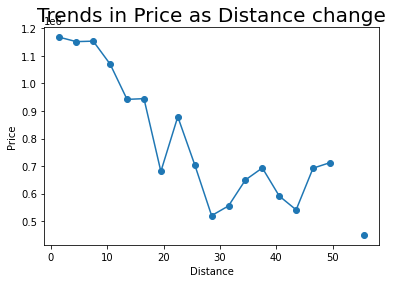

In [25]:
plt.plot(tmp, marker='o')
plt.title('Trends in Price as Distance change', size=20)
plt.xlabel('Distance')
plt.ylabel('Price');

Như vậy nhìn qua biểu đồ chúng ta có thể nhận thấy một xu hướng chung đó là khoảng cách càng xa thì giá nhà càng giảm, một số ngoại lệ thì có lẽ do nhiều yếu tố khác chi phối. Biểu đồ sẽ tồn tại những điểm không có đoạn nối đó là do khi chia bin có một số khoảng cách không có, hoặc là do theo như file mô tả khoảng cách trong bin đó thì giá nhà không được công khai

### Câu 2: Đâu là top 5 nhân viên seller rao bán được nhiều nhà nhất trong mỗi năm?

Để trả lời được câu hỏi này, chúng ta cần thực hiện như sau:
- Tạo dataframe seller_df với ba cột `Year`, `SellerG` và `Count`, trong đó cột `Count` là số lượng nhà được rao bán của mỗi nhân viên trong mỗi năm
- Tạo dataframe top5_seller_df lấy top 5 nhân viên rao bán được nhiều nhà nhất trong mỗi năm

- Code bước 1:

In [26]:
seller_df = mhm_df[['Year', 'SellerG']]
seller_df = pd.DataFrame(seller_df.groupby(['Year', 'SellerG']).size())
seller_df.columns = ['Count']
seller_df

Count
Year SellerG                           
2016 @Realty                          3
     ASL                              6
     Abercromby's                    19
     Abley                            3
     Airport                          1
...                                 ...
2018 hockingstuart/hockingstuart      4
     iHomes                           2
     iSell                           26
     iTRAK                           18
     voglwalpole                      4

[957 rows x 1 columns]

- Code bước 2:

In [27]:
top5_seller = seller_df['Count'].groupby('Year', group_keys=False)
top5_seller_df = pd.DataFrame(top5_seller.nlargest(5))
top5_seller_df

Count
Year SellerG             
2016 Barry           2012
     Jellis          1361
     hockingstuart   1352
     Nelson          1290
     Ray             1268
2017 Barry           2854
     Jellis          2130
     Nelson          1898
     Ray             1841
     hockingstuart   1830
2018 Barry           2028
     Jellis          2007
     Nelson          1551
     Ray             1445
     hockingstuart   1150

Theo như quan sát trên `top5_seller_df` thì Barry là nhân viên rao bán nhiều nhà nhất trong ba năm liên tiếp, có lẽ người mua nên suy nghĩ mua nhà do nhân viên này giới thiệu 😉

### Câu 3: Giá nhà trung bình của mỗi loại nhà (`Type`) tại các vùng (`Regionname`) là bao nhiêu?

Để trả lời câu hỏi này chúng ta cần làm như sau:
- Tính giá trung bình của mỗi loại nhà tại mỗi vùng, lưu vào dataframe type_region_df, dataframe này là multiIndex với level thứ nhất là loại nhà, level thứ 2 là vùng
- Vẽ biểu đồ cột nhóm, mỗi nhóm biểu thị cho một loại nhà, mỗi cột trong nhóm biểu thị cho một vùng, trục hoành là loại nhà, trục tung là giá của nhà

- Code bước 1:

In [28]:
type_region_df = mhm_df[['Type', 'Regionname', 'Price']]
type_region_df = type_region_df.groupby(['Regionname', 'Type']).mean()
type_region_df

Price
Regionname                 Type             
Eastern Metropolitan       h    1,148,132.49
                           t      916,497.35
                           u      703,788.57
Eastern Victoria           h      694,976.40
                           t      565,500.00
                           u      469,357.14
Northern Metropolitan      h      905,362.38
                           t      713,080.60
                           u      574,629.09
Northern Victoria          h      644,728.35
                           t      610,000.00
                           u      569,222.22
South-Eastern Metropolitan h      899,620.47
                           t      834,930.05
                           u      571,837.90
Southern Metropolitan      h    1,802,770.16
                           t    1,209,445.80
                           u      694,922.36
Western Metropolitan       h      856,747.04
                           t      720,504.57
                           u      503,375.69
Western Victoria           h      417,291.67
                           u      297,500.00

- Code bước 2: 

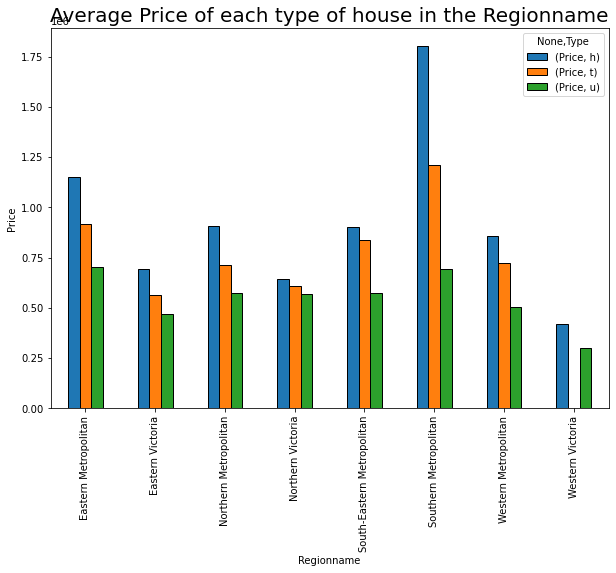

In [29]:
a = type_region_df.unstack()
plt.rcParams["figure.figsize"] = (10, 7)
a.plot(kind='bar', edgecolor='black')
plt.title('Average Price of each type of house in the Regionname', size=20)
plt.ylabel('Price')
plt.xticks(rotation=90);

Quan sát vào biểu đồ chúng ta có thể nhận ra nhà loại h thì có giá cao nhất trong các loại, và vùng có giá nhà cao nhất là vùng Southern Metropolitian (có 2 loại nhà có giá cao nhất)

### Câu 4: Trong ba năm thu thập dữ liệu, trung bình giá nhà có sự thay đổi như thế nào qua các tháng?

Để trả lời cho câu hỏi này chúng ta cần làm như sau:
- Tính dataframe price_month_df gồm có 3 cột 2016, 2017, 2018 ứng với giá nhà trung bình theo các tháng trong 3 năm và 12 dòng (1, 2, 3, ..., 12) ứng với 12 tháng
- Vẽ một biểu đồ đường để thể hiện xu hướng, mỗi đường thể hiện cho một năm, trong đó trục hoành thể hiện cho tháng và trục tung thể hiện cho trung bình giá nhà. Khi vẽ xong các đường sẽ thấy ở một số tháng sẽ không có đường nối, lí do là bởi vì có thể tháng đó của năm đó không có dữ liệu về nhà ở trong data hoặc nguyên nhân thứ 2 là do giống như file mô tả đã nói, các nhà rao bán trong tháng đó đều bị ẩn đi giá nhà theo yêu cầu (xem lại cột `Method`)

- Code bước 1:

In [30]:
price_month_df = mhm_df[['Price', 'Month', 'Year']]
price_month_df = price_month_df.groupby(['Year', 'Month']).mean()
price_month_df = price_month_df.unstack(level=0)
price_month_df

Price                          
Year          2016         2017         2018
Month                                       
1       791,200.00          NaN   947,834.93
2       742,379.21   979,943.98   988,639.68
3              NaN 1,038,974.12 1,080,313.63
4       904,042.59   962,035.35   934,084.14
5       950,964.36 1,052,220.69 1,060,640.43
6       949,654.68 1,075,446.09   981,433.49
7       876,816.10   877,394.68   863,357.97
8       964,996.57 1,102,766.14   984,918.96
9       986,699.25 1,056,204.39 1,061,225.80
10      973,415.08 1,065,097.71   902,122.19
11      998,917.14 1,046,779.71          NaN
12    1,029,927.02   969,171.24          NaN

- Code bước 2:

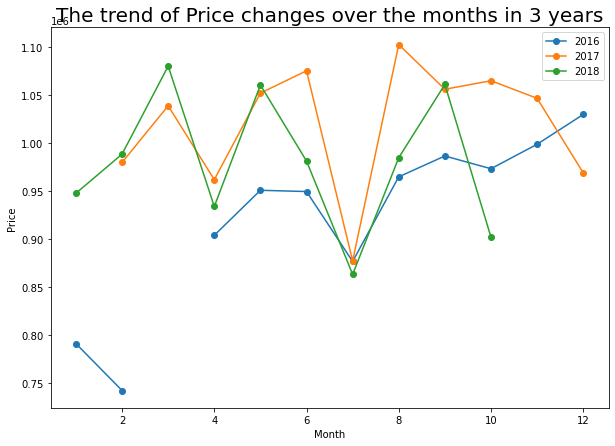

In [31]:
plt.plot(price_month_df, marker='o')
plt.legend(['2016', '2017', '2018'])
plt.title('The trend of Price changes over the months in 3 years', size=20)
plt.xlabel('Month')
plt.ylabel('Price');

Quan sát biểu đồ ta có thể nhận thấy rằng giá nhà qua các tháng trong 3 năm có xu hướng khá giống nhau từ tháng 4 đến tháng 8, đặc biệt ở tháng 8 có sự giảm mạnh giá nhà so với tháng 7 trước đó

### Câu 5: Phần trăm doanh số bán nhà theo từng mùa là bao nhiêu?

Để trả lời cho câu hỏi này chúng ta cần làm như sau:
- Tạo dataframe season_sales_df gồm hai cột `Year` và `Month`, sau đó thêm cột `Season` vào dataframe này theo nguyên tắc [này](https://www.australia.com/en/facts-and-planning/weather-in-australia.html#:~:text=Australia's%20seasons%20are%20at%20opposite,rainfall%20in%20Australia's%20capital%20cities.)
- Đếm số nhà bán được theo từng mùa trong các năm
- Vẽ biểu đồ pie thể hiện phần trăm nhà bán được theo từng mùa, dùng tham số explode để tách riêng mùa có doanh số cao nhất                                                                                            

- Code bước 1:

In [32]:
season_sales_df = mhm_df[['Year', 'Month']]
season_sales_df['Season'] = np.nan
lst = [season_sales_df]
for column in lst:
    column.loc[(column['Month'] >= 9) & (column['Month'] <= 11), 'Season'] = 'Spring'
    column.loc[(column['Month'] <= 2) | (column['Month'] == 12), 'Season'] = 'Summer'
    column.loc[(column['Month'] >= 3) & (column['Month'] <= 5), 'Season'] = 'Autumn'
    column.loc[(column['Month'] >= 6) & (column['Month'] <= 8), 'Season'] = 'Winter'
      
season_sales_df.sample(5)

,Year,Month,Season
39860,2017,5,Autumn
17406,2017,12,Summer
28784,2016,10,Spring
17946,2017,12,Summer
1287,2018,9,Spring


- Code bước 2:

In [33]:
season_sales_df = pd.DataFrame(season_sales_df.groupby(['Year', 'Season'])['Season'].count())
season_sales_df.columns = ['Sale']
season_sales_df

Sale
Year Season      
2016 Autumn  3284
     Spring  6697
     Summer  1831
     Winter  5123
2017 Autumn  7138
     Spring  8307
     Summer  4492
     Winter  5917
2018 Autumn  7797
     Spring  3375
     Summer  3516
     Winter  5544

- Code bước 3:

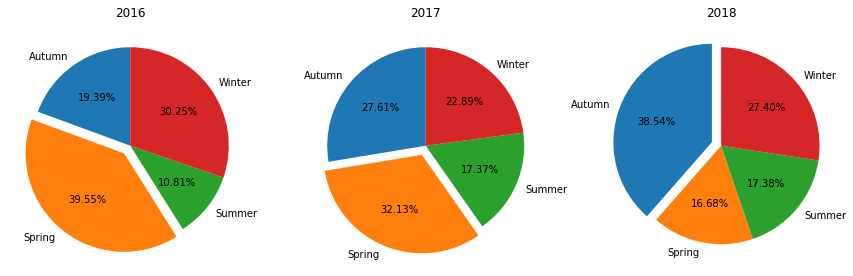

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(15)
fig.set_figwidth(15)
myexplode = [[0, 0.1, 0, 0], [0, 0.1, 0, 0], [0.1, 0, 0, 0]]
ax1.pie(season_sales_df.loc[2016].Sale, labels = season_sales_df.loc[2016].index,
        autopct='%1.2f%%', startangle=90, explode=myexplode[0])
ax1.set_title('2016')
ax2.pie(season_sales_df.loc[2017].Sale, labels = season_sales_df.loc[2017].index,
        autopct='%1.2f%%', startangle=90, explode=myexplode[1])
ax2.set_title('2017')
ax3.pie(season_sales_df.loc[2018].Sale, labels = season_sales_df.loc[2018].index,
        autopct='%1.2f%%', startangle=90, explode=myexplode[2])
ax3.set_title('2018')
plt.show()

Theo quan sát trên biểu đồ, chúng ta nhận thấy rằng mùa hè luôn có doanh số bán thấp nhất trong 3 năm, có lẽ là do thời tiết nắng nóng quá nên người ta ít đi mua chăng? Điều này chúng ta không thực sự biết rõ. Ngoài ra không thể khẳng định gì về tính chu kì của doanh số bán nhà theo mùa

## Nhìn lại quá trình làm đồ án

### Thành viên: Phan Văn Võ Quyền

Khó khăn:
- Khó khăn trong việc sử dụng một số lệnh git, trong quá trình làm bài đã push nhầm file checkpoint lên github
- Khó khăn ở việc chọn dữ liệu, vì Kaggle là một nguồn dữ liệu lớn, do đó đứng trước nhiều sự lựa chọn em gặp một số khó khăn nhất định, phải đảm bảo yếu tố thời gian làm lẫn độ khó của dữ liệu
- Khó khăn trong việc đặt câu hỏi sao cho đảm báo yếu tố hữu ích lẫn độ khó, trong quá trình trả lời câu hỏi số 1 gặp khó khăn trong việc thực hiện ý tưởng bằng code  
- Thời gian gấp rút do nhiều môn xảy ra đồ án cùng thời điểm

Điều hữu ích học được:
- Phối hợp làm việc nhóm và thực hiện trên branch github là một công việc thiết thực cho quá trình đi làm sau này
- Học được nhiều cách xử lí dữ liệu trong quá trình thực hiện trả lời câu hỏi
- Nắm vững hơn về quy trình khoa học dữ liệu

### Thành viên: Cao Văn Phúc

Khó khăn:
- Khó khăn ở việc chọn dữ liệu, vì Kaggle là một nguồn dữ liệu lớn, do đó đứng trước nhiều sự lựa chọn em gặp một số khó khăn nhất định, phải đảm bảo yếu tố thời gian làm lẫn độ khó của dữ liệu
- Khó khăn trong việc đặt câu hỏi sao cho đảm báo yếu tố hữu ích lẫn độ khó
- Thời gian gấp rút do nhiều môn xảy ra đồ án cùng thời điểm
- Khó khăn khi sử dụng git khi merge file notebook
- Khó khăn khi vì chưa nắm rõ được quy trình, cách xử lý, phân tích dữ liệu
- Thời gian tiếp cận, sử dụng python, numpy, pandas khá ít

Điều hữu ích học được:
- Nhận biết cách xử lý, phân tích dữ liệu để trả lời câu hỏi
- Nhận biết quy trình khoa học dữ liệu
- Nhận biết các công cụ, thư viện hỗ trợ như numpy, pandas, matplotlib, anaconda, ...

### Cả nhóm:

Nếu có thêm thời gian nhóm sẽ:
- Thử sức với những dữ liệu phức tạp hơn 
- Có thể nghiên cứu sâu hơn về các cột thuộc tính khác để đặt đa dạng câu hỏi hơn
- Tìm hiểu thêm về địa lý, quản lí chính quyền ở Úc để khám phá, tìm hiểu chính xác hơn nữa về dữ liệu

## Tài liệu tham khảo

1. Slide bài giảng
2. Các Homework
3. https://stackoverflow.com/questions/45273731/binning-column-with-python-pandas/45273750
4. https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups
4. https://pandas.pydata.org/docs/reference/frame.html#

# Kết thúc đồ án, nhóm xin chân thành cảm ơn thầy trong xuyên suốt quá trình học tập và làm đồ án ạ